In [23]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

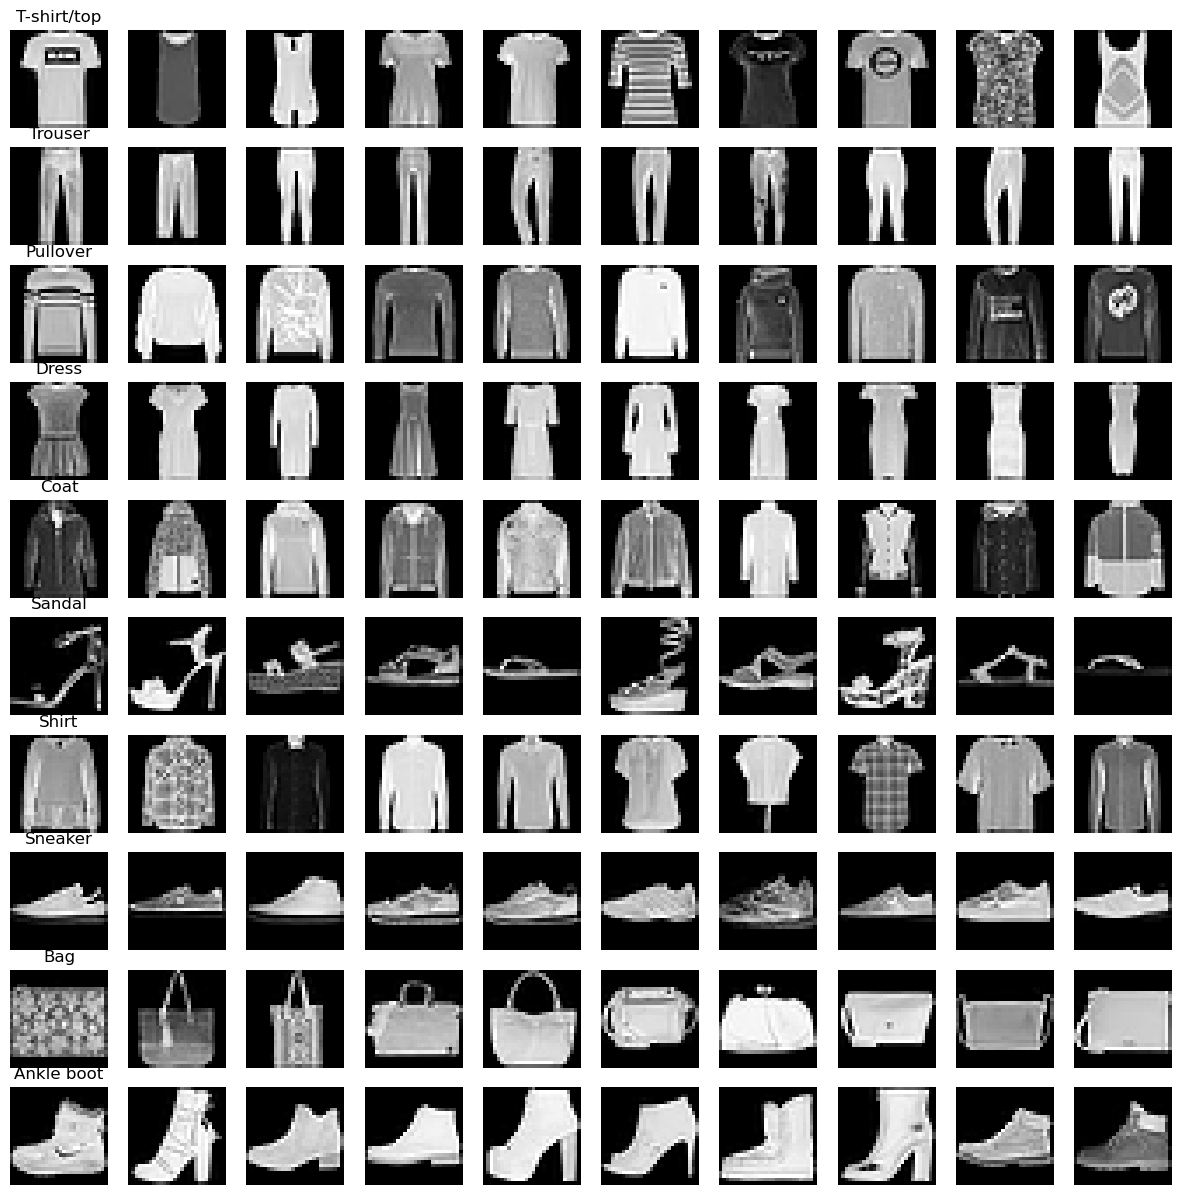

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Class labels
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Display 10 representative images from each class
plt.figure(figsize=(15, 15))

for i in range(10):
    class_indices = [idx for idx, label in enumerate(train_labels) if label == i][:10]  # Get indices of the first 10 instances for each class
    for j, idx in enumerate(class_indices):
        plt.subplot(10, 10, i * 10 + j + 1)
        plt.imshow(train_images[idx], cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.title(class_labels[i])

plt.show()

In [14]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


# Load Fashion MNIST dataset
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [15]:
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc_model = torch.nn.Sequential(
        nn.Linear(28 * 28, 200),
        nn.ReLU(),
        nn.Linear(200, 200),
        nn.ReLU(),
        nn.Linear(200, 10))

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc_model(x)
        return x

# Instantiate the model
model = Net()


In [17]:
criterion = nn.CrossEntropyLoss()
learning_rates = [0.1]
batch_sizes = [16]
epochs = 30

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"Training with learning rate {lr} and batch size {batch_size}")
        
        # Set up data loader with the specified batch size
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
        testLoader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)
        # Set up optimizer
        optimizer = optim.SGD(model.parameters(), lr=lr)

        # Training loop
        train_losses = []
        test_losses = []
        for epoch in range(epochs):
            train_loss = 0.0
            test_loss = 0.0
            for inputs, labels in trainloader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()
            for inputs, labels in testloader:
                with torch.no_grad():
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    test_loss += loss.item()
            train_loss = train_loss/len(trainloader)
            test_loss = test_loss/len(testloader)
            train_losses.append(train_loss)
            test_losses.append(test_loss)

        # Plot the training curve
        print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))



Training with learning rate 0.1 and batch size 16
Epoch 29, Train loss 0.13080390852287335, Test loss 0.5119503962386186


In [18]:
def evaluate(dataloader):
    total, correct = 0, 0
    model.eval() # don't update weights
    for data in dataloader:
        images, labels = data
        predicted_output = model(images)
        _, predicted_labels = torch.max(predicted_output,1)
        total += labels.size(0)
        correct += (predicted_labels == labels).sum().item()
    return 100 * correct/total

print('Train acc = %0.2f, test acc = %0.2f' % (evaluate(trainloader), evaluate(testloader)))


Train acc = 94.69, test acc = 88.13


In [19]:
model = Net()

criterion = nn.CrossEntropyLoss()
learning_rates = [0.5]
batch_sizes = [16]
epochs = 30

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"Training with learning rate {lr} and batch size {batch_size}")
        
        # Set up data loader with the specified batch size
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
        testLoader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)
        # Set up optimizer
        optimizer = optim.SGD(model.parameters(), lr=lr)

        # Training loop
        train_losses = []
        test_losses = []
        for epoch in range(epochs):
            train_loss = 0.0
            test_loss = 0.0
            for inputs, labels in trainloader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()
            for inputs, labels in testloader:
                with torch.no_grad():
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    test_loss += loss.item()
            train_loss = train_loss/len(trainloader)
            test_loss = test_loss/len(testloader)
            train_losses.append(train_loss)
            test_losses.append(test_loss)

        # Plot the training curve
        print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

print('Train acc = %0.2f, test acc = %0.2f' % (evaluate(trainloader), evaluate(testloader)))


Training with learning rate 0.5 and batch size 16
Epoch 29, Train loss 2.3100900310516357, Test loss 2.309164991803989
Train acc = 10.00, test acc = 9.99


In [20]:
model = Net()

criterion = nn.CrossEntropyLoss()
learning_rates = [0.1]
batch_sizes = [64]
epochs = 30

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"Training with learning rate {lr} and batch size {batch_size}")
        
        # Set up data loader with the specified batch size
        trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
        testLoader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)
        # Set up optimizer
        optimizer = optim.SGD(model.parameters(), lr=lr)

        # Training loop
        train_losses = []
        test_losses = []
        for epoch in range(epochs):
            train_loss = 0.0
            test_loss = 0.0
            for inputs, labels in trainloader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()
            for inputs, labels in testloader:
                with torch.no_grad():
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    test_loss += loss.item()
            train_loss = train_loss/len(trainloader)
            test_loss = test_loss/len(testloader)
            train_losses.append(train_loss)
            test_losses.append(test_loss)

        # Plot the training curve
        print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

print('Train acc = %0.2f, test acc = %0.2f' % (evaluate(trainloader), evaluate(testloader)))


Training with learning rate 0.1 and batch size 64
Epoch 29, Train loss 0.11271574285461196, Test loss 0.39446732677092217
Train acc = 96.02, test acc = 89.03


In [ ]:
# Learning rate of 0.1 and batch size 64 had the best train and 
# test accuracy with 96.02 and 89.03, respectively